# Import Section

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install category_encoders
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
%pylab inline  
import matplotlib.pyplot as plt # 2D graphics
import seaborn as sns # improve the appearance of graphics
import plotly.express as px # line chart
import category_encoders as ce # table categorization
from category_encoders.one_hot import OrdinalEncoder # convert table rows to ordinal numbers
import plotly.graph_objects as go # figure creation
from scipy import stats # statistical function
from sklearn import tree # Decision trees

In [89]:
df = pd.read_csv('ds_salaries.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [90]:
display (df.info()) #check null spaces

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


None

# First Brainstorm

In [91]:
# i made a lot of graphs on other code grup, but here i put just one to exemplification my brainstorm process
for coluna in df.columns:
    grafico = px.histogram(df, x=coluna, color="work_year")
    grafico.show()

# Iinsights

**Heatmap to See The Correlations Between  Table Columns**

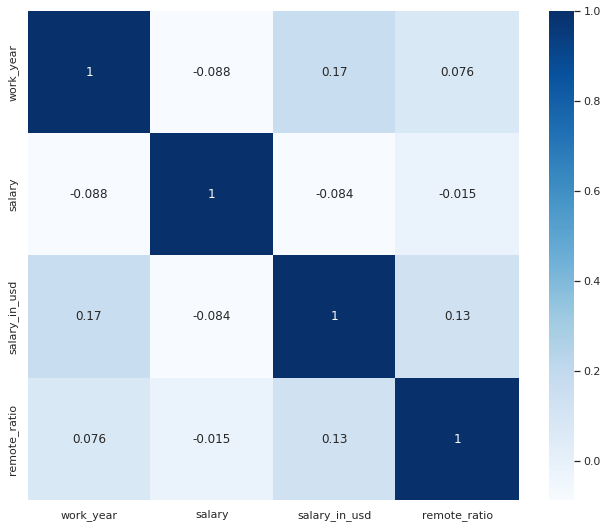

In [92]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(), annot=True, cmap="Blues")

**Increased Data Over the Years**

In [93]:
work_year = df.groupby('work_year').size().reset_index()
work_year.columns.values[1] = 'total_number'
work_year = work_year.sort_values(by = 'total_number',ascending = False)
display(work_year)
grafico = px.histogram(df, x=df['work_year'], color="work_year")

grafico.show()

,work_year,total_number
2,2022,318
1,2021,217
0,2020,72


**More Than Half of Data Came From Medium Sized Companies**

In [94]:
company_size = df.groupby('company_size').size().reset_index()
company_size.columns.values[1] = 'total_number'
company_size = company_size.sort_values(by = 'total_number',ascending = False)
display(company_size)
grafico = px.pie(df, df['company_size'], color="company_size")
grafico.show()

,company_size,total_number
1,M,326
0,L,198
2,S,83


**81,2% of The Data Came From Mid and Senior Levels**

In [95]:
experience_level = df.groupby('experience_level').size().reset_index()
experience_level.columns.values[1] = 'total_number'
experience_level = experience_level.sort_values(by = 'total_number',ascending = False)
display(experience_level)
grafico = px.pie(df, df['experience_level'], color="experience_level")
grafico.show()


,experience_level,total_number
3,SE,280
2,MI,213
0,EN,88
1,EX,26


**Full Time Employment Type is Way Bigger Than The Other Ones**

In [96]:
employment_type = df.groupby('employment_type').size().reset_index()
employment_type.columns.values[1] = 'total_number'
employment_type = employment_type.sort_values(by = 'total_number',ascending = False)
display(employment_type)

,employment_type,total_number
2,FT,588
3,PT,10
0,CT,5
1,FL,4


# Detect and Remove Outliers

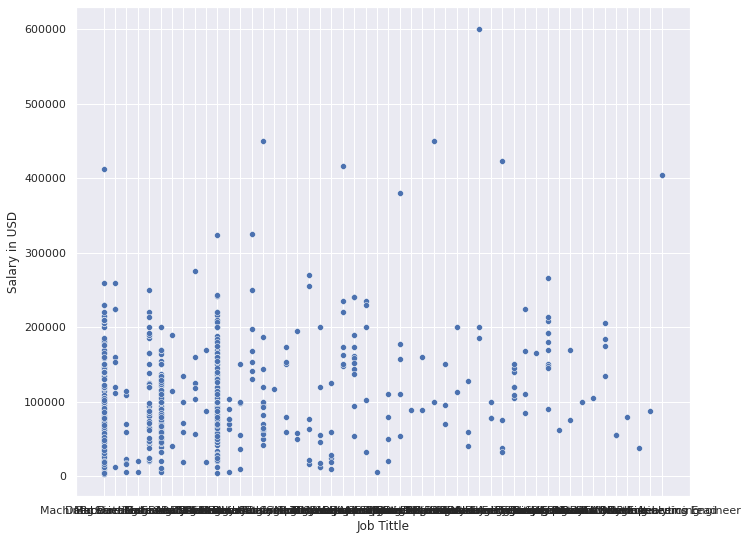

In [97]:
#There are outliers in the salary, even converted to dollars

sns.scatterplot(x='job_title', y='salary_in_usd',
             data=df)

plt.xlabel("Job Tittle")
plt.ylabel("Salary in USD")
plt.show()

In [98]:
# Find outliers

Q1 = df.salary_in_usd.quantile(0.25)
Q3 = df.salary_in_usd.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df[(df.salary_in_usd<lower_limit)|(df.salary_in_usd>upper_limit)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M
519,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L


In [99]:
# Remove outliers
df_no_outlier = df[(df.salary_in_usd>lower_limit)&(df.salary_in_usd<upper_limit)]
df_no_outlier

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


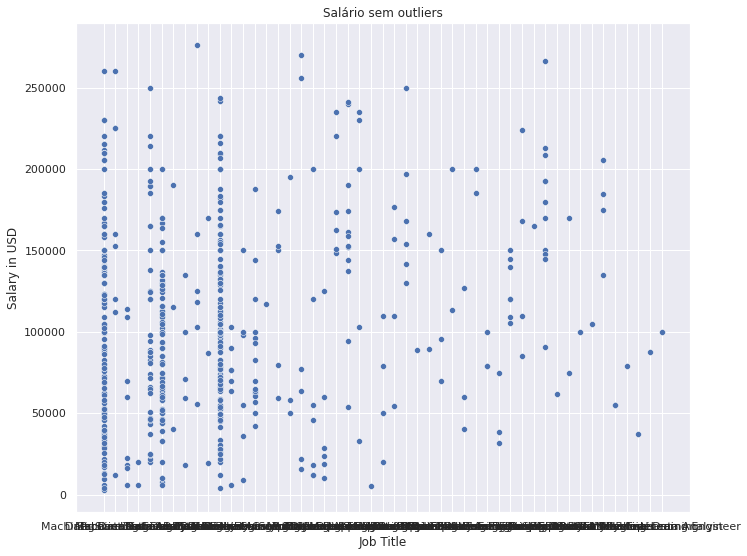

In [100]:
# Without the outliers it is easier to calculate the data trends 

sns.scatterplot(x='job_title', y='salary_in_usd',
             data=df_no_outlier)

plt.xlabel("Job Title")
plt.ylabel("Salary in USD")
plt.title("Salário sem outliers")
plt.show()

# Correlations

In [101]:
# Turn every element of dataset into numerical

df2 = df_no_outlier
df2["employment_type"] = df2["employment_type"].replace({"FT": "1", "PT": "2", "CT": "3", "FL": "4"}).astype(np.int64)
df2["company_size"] = df2["company_size"].replace({"S": "1", "M": "2", "L":"3"}).astype(np.int64)
df2["experience_level"] = df2["experience_level"].replace({"EN": "1", "MI": "2", "SE": "3", "EX": "4"}).astype(np.int64)
df_numbers = OrdinalEncoder(cols=['job_title','employee_residence','company_location','salary_currency'])
df_numbers = df_numbers.fit_transform(df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

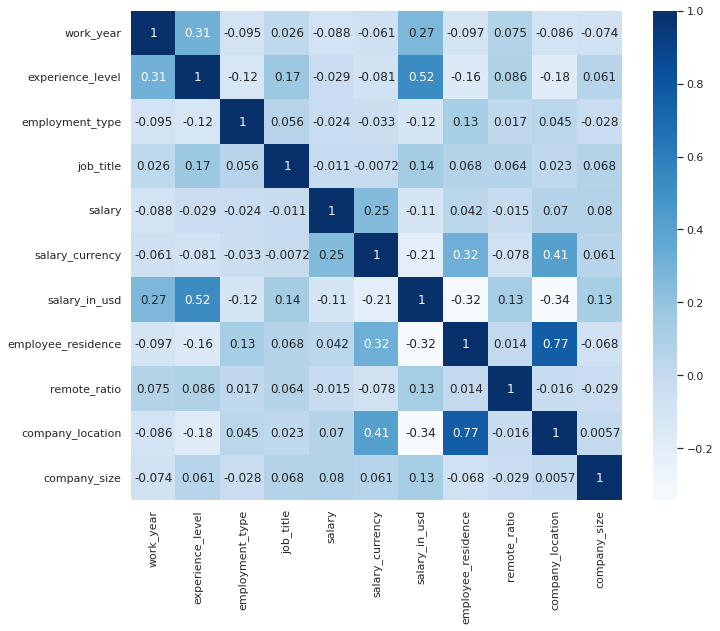

In [102]:
# Now its possible to see all correlations into two columns of dataset

sns.heatmap(df_numbers.corr(), annot=True, cmap="Blues")

In [103]:
Same_Location = (df_no_outlier["employee_residence"] == df_no_outlier["company_location"]).to_numpy()
Same_Location = pd.DataFrame(data = {'Same_Location':Same_Location})

grafico = px.pie(Same_Location, Same_Location['Same_Location'], color="Same_Location")

Same_Location = Same_Location.groupby('Same_Location').size().reset_index()
Same_Location.columns.values[1] = 'total_number'
Same_Location = Same_Location.sort_values(by = 'total_number',ascending = False)

display(Same_Location)
grafico.show()

,Same_Location,total_number
1,True,546
0,False,51


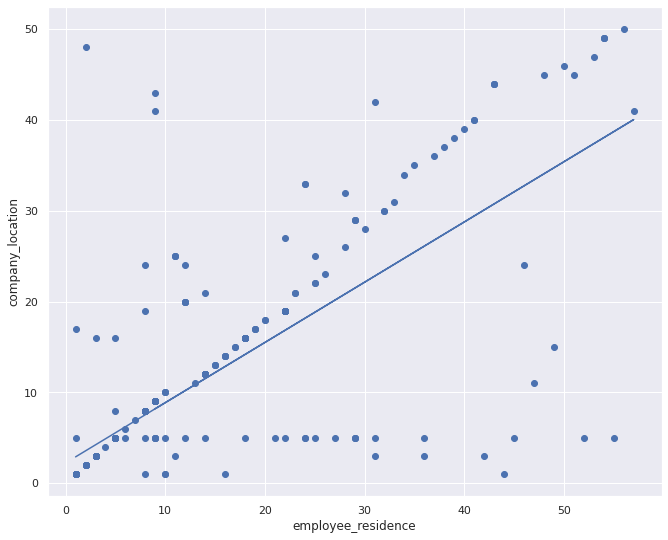

In [104]:
# With the linear regression made in this scatter plot, it is possible to observe that the 
# tendency of the dataset is that people work for companies that are in the same country as they live

employee_residence = df_numbers['employee_residence']
company_location = df_numbers['company_location']
slope, intercept, r, p, std_err = stats.linregress(employee_residence, company_location)

def myfunc(employee_residence):
  return slope * employee_residence + intercept

mymodel = list(map(myfunc, employee_residence))

plt.scatter(employee_residence, company_location)
plt.plot(employee_residence, mymodel)
xlabel('employee_residence') 
ylabel('company_location') 
plt.show()

# Decision Tree

## Legend

**Enter the Desired Work Year Normally**

In [105]:
# experience_level

experience_level1 = pd.Series({'experience_level': 'EN', 'experience_level ': 1})
experience_level2 = pd.Series({'experience_level': 'MI', 'experience_level ': 2})
experience_level3 = pd.Series({'experience_level': 'SE', 'experience_level ': 3})
experience_level4 = pd.Series({'experience_level': 'EX', 'experience_level ': 4})

experience_level_tag = pd.DataFrame([experience_level1, experience_level2, experience_level3, experience_level4])
experience_level_tag

,experience_level,experience_level
0,EN,1
1,MI,2
2,SE,3
3,EX,4


In [106]:
# employment_type

employment_type1 = pd.Series({'employment_type': 'FT', 'employment_type ': 1})
employment_type2 = pd.Series({'employment_type': 'PT', 'employment_type ': 2})
employment_type3 = pd.Series({'employment_type': 'CT', 'employment_type ': 3})
employment_type4 = pd.Series({'employment_type': 'FL', 'employment_type ': 4})

employment_type_tag = pd.DataFrame([employment_type1, employment_type1, employment_type3, employment_type4])
employment_type_tag

,employment_type,employment_type
0,FT,1
1,FT,1
2,CT,3
3,FL,4


In [107]:
# job_title

job_title_numbers = df_no_outlier.groupby('job_title').size().reset_index()
job_title_numbers.columns.values[1] = 'total_number'
job_title_numbers = job_title_numbers.sort_values(by = 'total_number',ascending = False, ignore_index=True)

job_title_no_outlier = df_numbers.groupby('job_title').size().reset_index()
job_title_no_outlier.columns.values[1] = 'total_number'
job_title_no_outlier = job_title_no_outlier.sort_values(by = 'total_number',ascending = False, ignore_index=True)

job_title_tag = pd.concat([job_title_numbers, job_title_no_outlier], axis=1)

job_title_tag2 = job_title_tag.drop('total_number',axis=1,inplace=True)

display(job_title_tag)

,job_title,job_title
0,Data Scientist,1
1,Data Engineer,11
2,Data Analyst,6
3,Machine Learning Engineer,5
4,Research Scientist,14
5,Data Science Manager,22
6,Data Architect,39
7,Big Data Engineer,3
8,Machine Learning Scientist,2
9,AI Scientist,19


In [108]:
# employee_residence

employee_residence_numbers = df_no_outlier.groupby('employee_residence').size().reset_index()
employee_residence_numbers.columns.values[1] = 'total_number'
employee_residence_numbers = employee_residence_numbers.sort_values(by = 'total_number',ascending = False, ignore_index=True)

employee_residence_no_outlier = df_numbers.groupby('employee_residence').size().reset_index()
employee_residence_no_outlier.columns.values[1] = 'total_number'
employee_residence_no_outlier = employee_residence_no_outlier.sort_values(by = 'total_number',ascending = False, ignore_index=True)

employee_residence_tag = pd.concat([employee_residence_numbers, employee_residence_no_outlier], axis=1)

employee_residence_tag2 = employee_residence_tag.drop('total_number',axis=1,inplace=True)

display(employee_residence_tag)

,employee_residence,employee_residence
0,US,5
1,GB,3
2,IN,9
3,CA,18
4,DE,1
5,FR,8
6,ES,22
7,GR,14
8,JP,2
9,PK,12


In [109]:
# remote_ratio

remote_ratio1 = pd.Series({'remote_ratio': 'No remote work (less than 20%)', 'remote_ratio ': 0})
remote_ratio2 = pd.Series({'remote_ratio': 'Partially remote', 'remote_ratio ': 50})
remote_ratio3 = pd.Series({'remote_ratio': 'Fully remote (more than 80%)', 'remote_ratio ': 100})

remote_ratio_tag = pd.DataFrame([remote_ratio1, remote_ratio2, remote_ratio3])
remote_ratio_tag

,remote_ratio,remote_ratio
0,No remote work (less than 20%),0
1,Partially remote,50
2,Fully remote (more than 80%),100


In [110]:
# company_location

company_location_numbers = df_no_outlier.groupby('company_location').size().reset_index()
company_location_numbers.columns.values[1] = 'total_number'
company_location_numbers = company_location_numbers.sort_values(by = 'total_number',ascending = False, ignore_index=True)

company_location_no_outlier = df_numbers.groupby('company_location').size().reset_index()
company_location_no_outlier.columns.values[1] = 'total_number'
company_location_no_outlier = company_location_no_outlier.sort_values(by = 'total_number',ascending = False, ignore_index=True)

company_location_tag = pd.concat([company_location_numbers, company_location_no_outlier], axis=1)

company_location_tag2 = company_location_tag.drop('total_number',axis=1,inplace=True)

display(company_location_tag)

,company_location,company_location
0,US,5
1,GB,3
2,CA,16
3,DE,1
4,IN,9
5,FR,8
6,ES,19
7,GR,12
8,JP,2
9,PL,14


In [111]:
# company_size

company_size1 = pd.Series({'company_size': 'S', 'company_size ': 1})
company_size2 = pd.Series({'company_size': 'M', 'company_size ': 2})
company_size3 = pd.Series({'company_size': 'L', 'company_size ': 3})

company_size_tag = pd.DataFrame([company_size1, company_size2, company_size3])
company_size_tag

,company_size,company_size
0,S,1
1,M,2
2,L,3


## Artificial Intelligence

In [112]:
# R²

inputs = df_numbers.drop('salary_in_usd',axis='columns')
inputs = inputs.drop('salary',axis='columns')
inputs = inputs.drop('salary_currency',axis='columns')

target = df_numbers['salary_in_usd']
model = tree.DecisionTreeRegressor()
model.fit(inputs, target)
model.score(inputs,target)

0.8496902246516469

In [114]:
# Artificial Intelligence Imput to Result in Salary in usd
# to calculate the probable salary follow the order below
# work_year, experience_level, employment_type, job_title, employee_residence, remote_ratio, company_location, company_size

model.predict([[2020,2,1,1,1,0,1,3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([79833.])